In [50]:
# pip install rasterio

In [51]:
# Install rasterio if not already installed
# !pip install rasterio

# Import necessary libraries
import numpy as np
import pandas as pd
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Open the raster file
ds = rio.open(Raster_file_path)

# Display metadata of the raster file
ds.meta

# Read the raster data into an array
arr = ds.read()
arr

# Print metadata information
print(ds.meta)

# Handle NaN values in the array by replacing them with 0
arr = np.where(np.isnan(arr), 0, arr)

# Check the shape of the array
arr.shape

# Reorder the dimensions of the array
arr = np.moveaxis(arr, 0, -1)
arr.shape

# Get the number of rows and columns in the array
nrow = arr.shape[0]
ncol = arr.shape[1]

# Reshape the array for use in machine learning models
satellite_features = np.reshape(arr, (-1, arr.shape[2]))


{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 6144, 'height': 6144, 'count': 3, 'crs': CRS.from_epsg(3857), 'transform': Affine(5.0, 0.0, 9250512.4512,
       0.0, -5.0, 2014648.3728)}


In [52]:
# Open the predicted vector raster file
road_ds = rio.open(predicted_vector_raster_path)

# Read the data from the raster file into an array
arr_road = road_ds.read()

# Move the axes of the array to the correct position
arr_road = np.moveaxis(arr_road, 0, -1)

# Reshape the array for machine learning model compatibility
arr_road = arr_road.reshape(-1, 3)

# Define the criteria for satellite labels based on pixel values
satellite_labels = np.where(np.all(arr_road != [255, 255, 255], axis=1), 1, 0)

# Print the shape of the satellite labels array
print(satellite_labels.shape)

# Print metadata information of the raster file
print(road_ds.meta)


(37748736,)
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 6144, 'height': 6144, 'count': 3, 'crs': CRS.from_epsg(3857), 'transform': Affine(5.0, 0.0, 9250512.4512,
       0.0, -5.0, 2014648.3728)}


In [53]:
# Print the shape of the arr_road array
print("Shape of arr_road:", arr_road.shape)

# Find and print the unique values in the satellite_labels array
unique_values = np.unique(satellite_labels)
print("Unique values in satellite_labels:", unique_values)


Shape of arr_road: (37748736, 3)
Unique values in satellite_labels: [0 1]


In [54]:
print(np.count_nonzero(satellite_labels))

1518


In [55]:
# Split the data into training and testing sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(satellite_features, satellite_labels, test_size=0.3)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

# Get the number of rows and columns in the testing set
nrow_test = X_test.shape[0]
ncol_test = X_test.shape[1]


(26424115, 3) (11324621, 3)


In [56]:
# Create a Random Forest Classifier with specified parameters
rfc = RandomForestClassifier(
    n_estimators=20,  # Number of trees in the forest
    verbose=3,  # Verbosity level (3 for the most detailed output)
    n_jobs=-1,  # Use all available processors for parallel processing
    class_weight='balanced'  # Adjust class weights to handle class imbalance
)


In [46]:
# Fit the Random Forest Classifier model on the training data
rfc.fit(X_train, y_train)

# Use the trained model to predict labels for all data points
y_pred = rfc.predict(satellite_features)

# Print the classification report to evaluate the model's performance
print(classification_report(satellite_labels, y_pred))


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 9 of 20
building tree 10 of 20
building tree 10 of 20
building tree 11 of 20
building tree 11 of 20
building tree 12 of 20
building tree 12 of 20
building tree 13 of 20
building tree 13 of 20
building tree 14 of 20
building tree 14 of 20
building tree 15 of 20
building tree 15 of 20
building tree 16 of 20
building tree 16 of 20
building tree 17 of 20
building tree 17 of 20
building tree 18 of 20
building tree 18 of 20
building tree 19 of 20
building tree 19 of 20
building tree 20 of 20
building tree 20 of 20


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  9.2min finished
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  9.2min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   49.6s finished
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   49.6s finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00  37747218
           1       0.01      0.67      0.02      1518

    accuracy                           1.00  37748736
   macro avg       0.51      0.83      0.51  37748736
weighted avg       1.00      1.00      1.00  37748736

              precision    recall  f1-score   support

           0       1.00      1.00      1.00  37747218
           1       0.01      0.67      0.02      1518

    accuracy                           1.00  37748736
   macro avg       0.51      0.83      0.51  37748736
weighted avg       1.00      1.00      1.00  37748736



In [47]:
from rasterio.plot import show

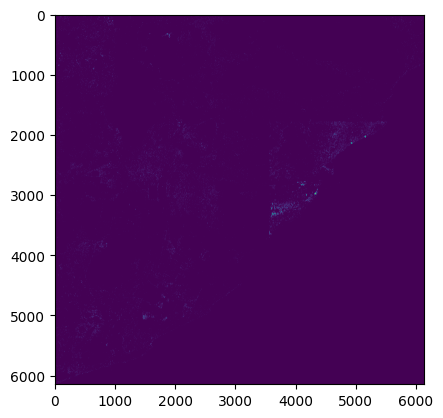

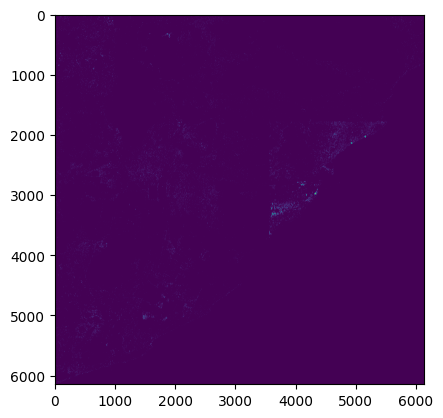

<Axes: >

<Axes: >

In [48]:
# Reshape the predicted labels array to match the original image dimensions
reshaped_pred = np.reshape(y_pred, (nrow, ncol))

# Display the reshaped predicted labels using the show function
show(reshaped_pred)


In [49]:
import rasterio
from rasterio.transform import from_origin

# Define the output file path for the GeoTIFF
output_file = "/content/drive/MyDrive/geotaProject/predicted-Tourism.tif"

# Get the dimensions of the predicted raster
height, width = predicted_raster.shape

# Define the coordinates and pixel dimensions for the GeoTIFF
top_left_x = 0
top_left_y = 0
pixel_width = 1
pixel_height = 1

# Create a transformation from the defined parameters
transform = from_origin(top_left_x, top_left_y, pixel_width, pixel_height)

# Get the data type of the predicted raster
dtype = predicted_raster.dtype

# Create a new GeoTIFF file and write the predicted raster data to it
with rasterio.open(output_file, 'w', driver='GTiff', height=height, width=width, count=1, dtype=dtype, transform=transform) as dst:
    dst.write(predicted_raster, 1)

# Print a message indicating successful saving of the TIFF file
print("TIFF file saved successfully!")


TIFF file saved successfully!
TIFF file saved successfully!
